In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [74]:
test = pd.read_csv("final_test.csv")
train  = pd.read_csv("final_train.csv")

test_chunk_15 = pd.read_csv("15_state_test.csv")
test_chunk_14 = pd.read_csv("14_state_test.csv")
test_chunk_13 = pd.read_csv("13_state_test.csv")

,States,Log-lik,df,AIC,BIC,Normalized Test,States.1,Log-lik.1,df.1,AIC.1,BIC.1,Normal Log-Lik
0,4,-54495.30,315,109620.60,111955.50,-1068.540000,4,-55090.700000,439,111059.40,114313.50,-1080.210000
1,6,-49655.72,485,100281.40,103876.50,-973.641569,6,-50124.800000,671,101591.60,106565.40,-982.839216
2,7,-48608.29,573,98362.58,102609.90,-953.103725,7,-49640.500000,790,113598.20,119454.00,-973.343137
3,8,-47173.75,663,95673.49,100588.00,-924.975490,8,-48056.900000,911,112066.90,118819.70,-942.292157
4,9,-44804.04,755,91118.08,96714.49,-878.510588,9,-45600.200000,1034,107854.60,115519.10,-894.121569
5,10,-45290.89,849,92279.77,98572.95,-888.056667,10,-46581.500000,1159,102724.10,111315.20,-913.362745
6,11,-44187.78,945,90265.57,97270.34,-866.427059,11,-44192.400000,1286,91125.12,100657.60,-866.517647
7,12,-42568.04,1043,87222.08,94953.28,-834.667451,12,-50917.900000,1415,106765.40,117254.10,-998.390196
8,13,-40549.06,1143,83384.12,91856.57,-795.079608,13,-43491.700000,1546,90189.16,101648.80,-852.778431
9,14,-41852.90,1245,86195.80,95424.31,-820.645098,14,-41317.500000,1679,85992.95,98438.47,-810.147059


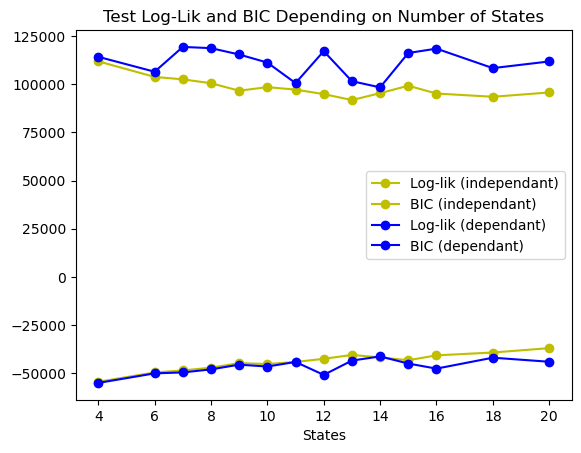

In [58]:
y1 = test["Log-lik"]
y2 = test["BIC"]
y3 = test["Log-lik.1"]
y4 = test["BIC.1"]

plt.plot(test['States'],y1,"-oy",label="Log-lik (independant)")
plt.plot(test['States'],y2,"-oy", label = "BIC (independant)")
plt.plot(test['States'],y3,"-ob",label="Log-lik (dependant)")
plt.plot(test['States'],y4,"-ob", label = "BIC (dependant)")
plt.title("Test Log-Lik and BIC Depending on Number of States")
plt.xlabel("States")

plt.gcf().axes[0].legend()
# plt.ylim((-200_000,_000))
# plt.yticks(range(-200_000,150_000,30_000))
# plt.gcf().axes[0].set_yticks(range(-60_000,150_000,30_000))
# plt.gcf().axes[0].set_yticklabels([f"{x}" for x in range(-60_000,150_000,30_000)])

plt.show()

  

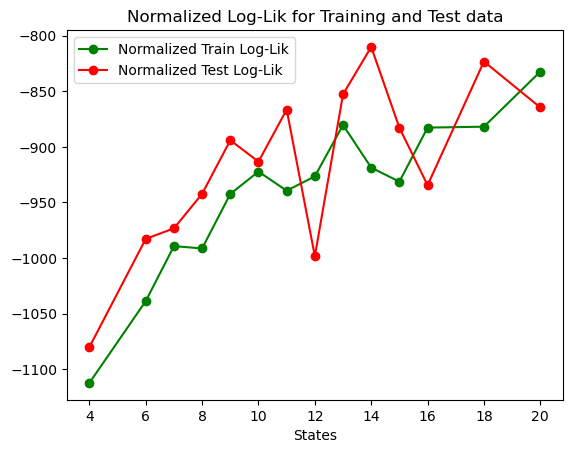

In [90]:
x = train["States"]
y1 = train["Log-lik.1"] / 153
y2 = test["Log-lik.1"] / 51

plt.plot(x,y1,"-og",label="Normalized Train Log-Lik")
plt.plot(x,y2,"-or", label = "Normalized Test Log-Lik")

plt.title("Normalized Log-Lik for Training and Test data")
plt.xlabel("States")

plt.gcf().axes[0].legend()

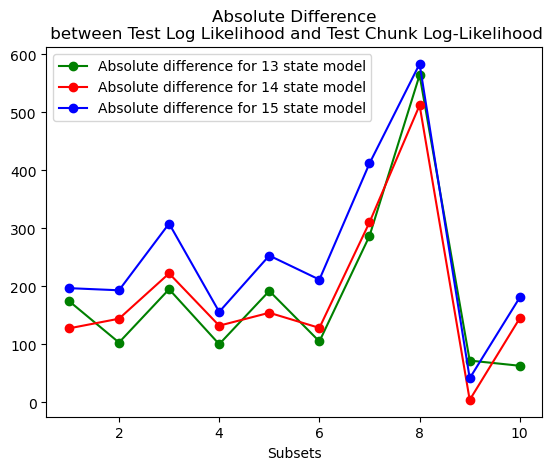

In [84]:
normed = test["Normalized Test"]
x =  test_chunk_15["Subset"]
y1 = abs(normed[8] - test_chunk_13["Log-likelihood"] / 5)
y2 =  abs(normed[9] - test_chunk_14["Log-likelihood"] / 5)
y3 = abs(normed[10] - test_chunk_15["Log-likelihood"] /5)


plt.plot(x,y1,"-og",label="Absolute difference for 13 state model")
plt.plot(x,y2,"-or", label = "Absolute difference for 14 state model")
plt.plot(x,y3,"-ob", label = "Absolute difference for 15 state model")
plt.title("Absolute Difference\n between Test Log Likelihood and Test Chunk Log-Likelihood")
plt.xlabel("Subsets")

plt.gcf().axes[0].legend()



Text(0.5, 1.0, 'Boxplots of Absolute Difference by Model')

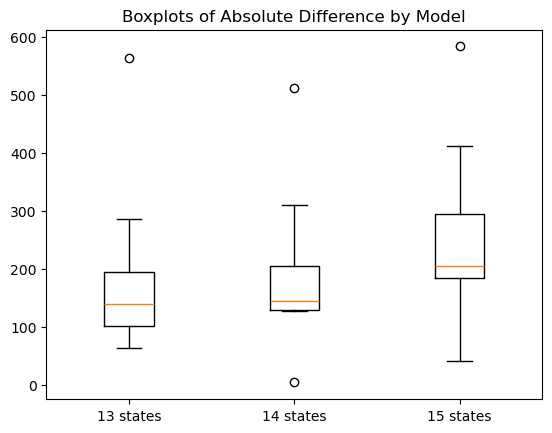

In [87]:
plt.boxplot([y1,y2,y3],labels=["13 states","14 states","15 states"])
plt.title("Boxplots of Absolute Difference by Model")